In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('./survey_results_public.csv')

In [4]:
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,19102.000000,16102.000000,15253.000000,7721.000000,13452.000000,5009.000000,818.000000
mean,9551.500000,7.343932,7.000721,3.685922,8.357865,58341.398571,32231.521687
std,5514.416757,1.919330,2.128648,7.330691,1.405546,40753.384986,28543.877274
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4776.250000,6.000000,6.000000,0.000000,8.000000,27956.989247,4716.459735
50%,9551.500000,8.000000,7.000000,1.000000,8.000000,51612.903226,29784.946237
75%,14326.750000,9.000000,8.000000,3.000000,9.000000,83333.333333,50000.000000
max,19102.000000,10.000000,10.000000,40.000000,10.000000,195000.000000,120000.000000


In [5]:
df.shape

(19102, 154)

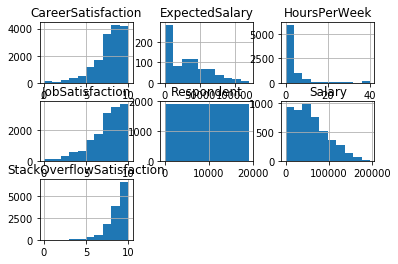

In [13]:
df.hist();

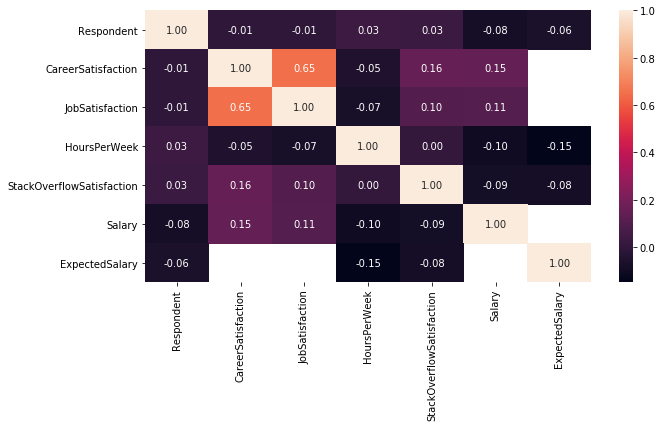

In [7]:
plt.figure(figsize = (10, 5))
sns.heatmap(df.corr(), annot = True, fmt = '.2f');

In [25]:
X = df[['CareerSatisfaction', 'JobSatisfaction', 'HoursPerWeek', 'StackOverflowSatisfaction']]
y = df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 42)

# instantiate
# fit training
# predict test data
# score your model on the test

lm_model = LinearRegression(normalize = True)

In [26]:
X_test.head()

,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction
3335,8.0,8.0,NaN,8.0
13641,7.0,7.0,NaN,NaN
13018,6.0,7.0,2.0,NaN
11346,8.0,7.0,NaN,NaN
12868,7.0,7.0,NaN,9.0


In [31]:
X_train.shape, y_train.shape

((13371, 4), (13371,))

In [38]:
lm_model.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

# practice

In [42]:
df.JobSatisfaction.max()

10.0

In [48]:
df[['CareerSatisfaction', 'JobSatisfaction', 'HoursPerWeek', 'StackOverflowSatisfaction', 'Salary', 'ExpectedSalary']].isnull().mean().sort_values(ascending = False)

ExpectedSalary               0.957177
Salary                       0.737776
HoursPerWeek                 0.595801
StackOverflowSatisfaction    0.295781
JobSatisfaction              0.201497
CareerSatisfaction           0.157052
dtype: float64

In [46]:
df_corr = df.corr().abs().unstack().sort_values(ascending = False).dropna()[('Salary',)]
df_corr[df_corr != 1]

CareerSatisfaction           0.149190
JobSatisfaction              0.107492
HoursPerWeek                 0.100515
StackOverflowSatisfaction    0.087542
Respondent                   0.081596
dtype: float64

In [67]:
df_corr = df.corr().unstack().sort_values(ascending = False).dropna()
df_corr

ExpectedSalary             ExpectedSalary               1.000000
StackOverflowSatisfaction  StackOverflowSatisfaction    1.000000
CareerSatisfaction         CareerSatisfaction           1.000000
JobSatisfaction            JobSatisfaction              1.000000
HoursPerWeek               HoursPerWeek                 1.000000
Respondent                 Respondent                   1.000000
Salary                     Salary                       1.000000
JobSatisfaction            CareerSatisfaction           0.654466
CareerSatisfaction         JobSatisfaction              0.654466
StackOverflowSatisfaction  CareerSatisfaction           0.155246
CareerSatisfaction         StackOverflowSatisfaction    0.155246
                           Salary                       0.149190
Salary                     CareerSatisfaction           0.149190
                           JobSatisfaction              0.107492
JobSatisfaction            Salary                       0.107492
StackOverflowSatisfaction

In [58]:
df.corr()['HoursPerWeek']['Salary']

-0.10051489772022784

In [63]:
df['ExpectedSalary'].isnull().mean()

0.9571772589257669

In [71]:
df['ExpectedSalary'].notnull().mean()

0.04282274107423306